In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [11]:
df1 = pd.read_csv('C:/Users/akhde/OneDrive/Desktop/MLOps/Loan-Fraud-Detection/data/raw/loan_applications.csv')
df2 = pd.read_csv('C:/Users/akhde/OneDrive/Desktop/MLOps/Loan-Fraud-Detection/data/raw/transactions.csv')

In [16]:
df2 = df2.drop(columns=['transaction_id'],axis=1)
df1 = df1.drop(columns=['application_id'],axis=1)

In [19]:
print(df1.shape)
print(df2.shape)

(50000, 20)
(50000, 15)


In [22]:
df1.isnull().mean()

customer_id                  0.00000
application_date             0.00000
loan_type                    0.00000
loan_amount_requested        0.00000
loan_tenure_months           0.00000
interest_rate_offered        0.00000
purpose_of_loan              0.00000
employment_status            0.00000
monthly_income               0.00000
cibil_score                  0.00000
existing_emis_monthly        0.00000
debt_to_income_ratio         0.00000
property_ownership_status    0.00000
residential_address          0.00000
applicant_age                0.00000
gender                       0.00000
number_of_dependents         0.00000
loan_status                  0.00000
fraud_flag                   0.00000
fraud_type                   0.97948
dtype: float64

In [23]:
df2.isnull().mean()

customer_id                          0.0
transaction_date                     0.0
transaction_type                     0.0
transaction_amount                   0.0
merchant_category                    0.0
merchant_name                        0.0
transaction_location                 0.0
account_balance_after_transaction    0.0
is_international_transaction         0.0
device_used                          0.0
ip_address                           0.0
transaction_status                   0.0
transaction_source_destination       0.0
transaction_notes                    0.0
fraud_flag                           0.0
dtype: float64

In [25]:
df1 = df1.drop(columns=['fraud_type'],axis=1)

In [26]:
df1.head()

,customer_id,application_date,loan_type,loan_amount_requested,loan_tenure_months,interest_rate_offered,purpose_of_loan,employment_status,monthly_income,cibil_score,existing_emis_monthly,debt_to_income_ratio,property_ownership_status,residential_address,applicant_age,gender,number_of_dependents,loan_status,fraud_flag
0,CUST109427,2023-04-09,Business Loan,604000.0,12,11.66,Medical Emergency,Retired,34700.0,714,1100.0,3.17,Rented,"94/31, Sehgal Zila, Vadodara-380521, Anantapur...",28,Female,3,Approved,0
1,CUST106146,2023-09-23,Car Loan,100000.0,240,13.62,Education,Unemployed,51600.0,667,0.0,0.00,Owned,"H.No. 00, Sheth Chowk, Ichalkaranji 006728, Im...",44,Other,3,Approved,0
2,CUST100674,2023-05-22,Education Loan,431000.0,60,11.40,Medical Emergency,Self-Employed,14800.0,808,4600.0,31.08,Rented,"H.No. 81, Dutta Path, Kozhikode-340301, Tadepa...",56,Other,4,Approved,0
3,CUST106466,2024-07-09,Car Loan,324000.0,120,10.36,Debt Consolidation,Self-Employed,28800.0,647,4000.0,13.89,Rented,"H.No. 022, Rege Road, Tiruvottiyur-927857, Aur...",27,Other,4,Declined,0
4,CUST112319,2023-11-20,Personal Loan,100000.0,36,14.14,Business Expansion,Salaried,43900.0,624,1100.0,2.51,Rented,"85/24, Bali Zila, Sambalpur 922071, Tumkur, Ke...",50,Other,0,Declined,0


In [27]:
df2.head()

,customer_id,transaction_date,transaction_type,transaction_amount,merchant_category,merchant_name,transaction_location,account_balance_after_transaction,is_international_transaction,device_used,ip_address,transaction_status,transaction_source_destination,transaction_notes,fraud_flag
0,CUST102188,2022-01-04 11:27:00,Bill Payment,2100.0,Dining,"Rattan, Khanna and Magar","Srikakulam, Himachal Pradesh",8211.0,0,Web,31.102.21.141,Success,BCHG80012468703731,Payment for Dining,0
1,CUST107144,2022-01-03 23:52:00,UPI,1400.0,Travel,Chauhan LLC,"Giridih, Manipur",12858.0,0,Web,176.48.222.166,Success,CJPZ11841095072972,Payment for Travel,0
2,CUST102126,2022-01-15 06:54:00,Debit Card,1000.0,Entertainment,Halder-Sarma,"Avadi, Kerala",19268.0,0,ATM,181.62.105.161,Success,TLCG50761416960179,Payment for Entertainment,0
3,CUST109887,2022-01-08 07:57:00,Credit Card,10500.0,Utilities,"Anand, Khare and Balakrishnan","Navi Mumbai, Maharashtra",29585.0,0,ATM,121.157.246.80,Success,PRZJ55096553432036,Payment for Utilities,0
4,CUST108620,2022-01-02 10:43:00,Loan Disbursement,8100.0,Electronics,Zacharia and Sons,"Visakhapatnam, Gujarat",0.0,0,ATM,129.96.5.57,Success,NBAI29021393288369,Payment for Electronics,0


In [47]:
df1['application_date'] = pd.to_datetime(df1['application_date'])

In [43]:
df2['transaction_date'] = pd.to_datetime(df2['transaction_date'])
df2['transaction_date'] = df2['transaction_date'].dt.date

In [48]:
df1.head()

,customer_id,application_date,loan_type,loan_amount_requested,loan_tenure_months,interest_rate_offered,purpose_of_loan,employment_status,monthly_income,cibil_score,existing_emis_monthly,debt_to_income_ratio,property_ownership_status,residential_address,applicant_age,gender,number_of_dependents,loan_status,fraud_flag
0,CUST109427,2023-04-09,Business Loan,604000.0,12,11.66,Medical Emergency,Retired,34700.0,714,1100.0,3.17,Rented,"94/31, Sehgal Zila, Vadodara-380521, Anantapur...",28,Female,3,Approved,0
1,CUST106146,2023-09-23,Car Loan,100000.0,240,13.62,Education,Unemployed,51600.0,667,0.0,0.00,Owned,"H.No. 00, Sheth Chowk, Ichalkaranji 006728, Im...",44,Other,3,Approved,0
2,CUST100674,2023-05-22,Education Loan,431000.0,60,11.40,Medical Emergency,Self-Employed,14800.0,808,4600.0,31.08,Rented,"H.No. 81, Dutta Path, Kozhikode-340301, Tadepa...",56,Other,4,Approved,0
3,CUST106466,2024-07-09,Car Loan,324000.0,120,10.36,Debt Consolidation,Self-Employed,28800.0,647,4000.0,13.89,Rented,"H.No. 022, Rege Road, Tiruvottiyur-927857, Aur...",27,Other,4,Declined,0
4,CUST112319,2023-11-20,Personal Loan,100000.0,36,14.14,Business Expansion,Salaried,43900.0,624,1100.0,2.51,Rented,"85/24, Bali Zila, Sambalpur 922071, Tumkur, Ke...",50,Other,0,Declined,0


[Text(0, 0, '40882'), Text(0, 0, '8092'), Text(0, 0, '542'), Text(0, 0, '484')]

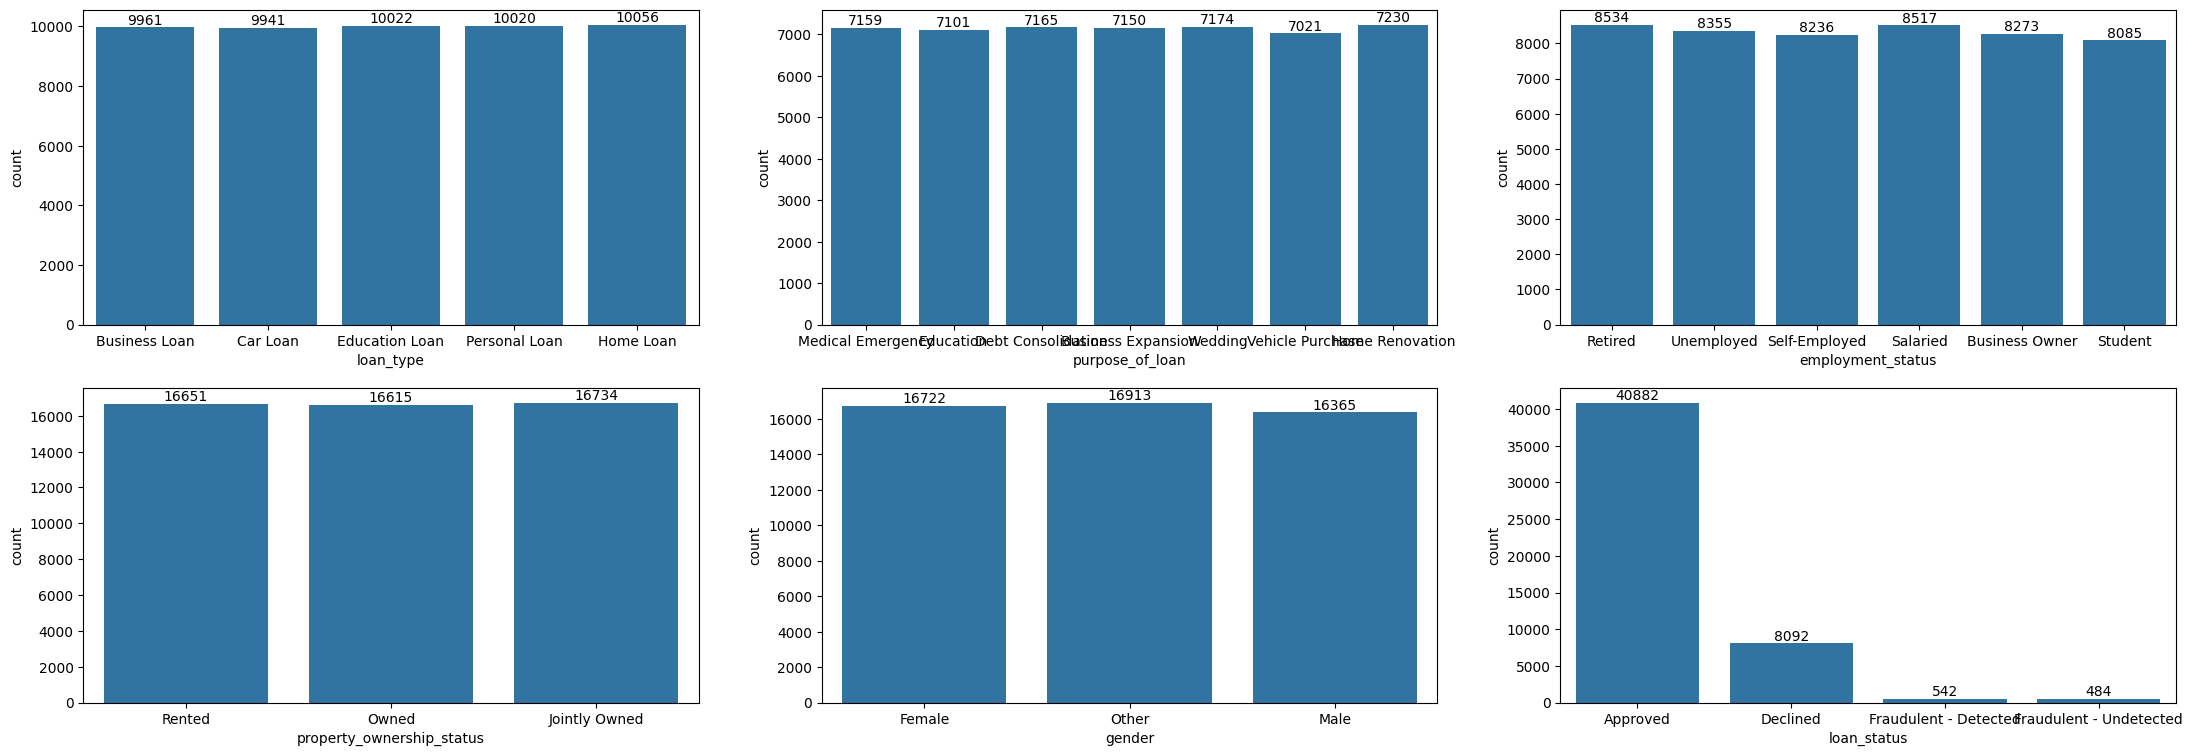

In [67]:
fig,ax = plt.subplots(2,3,figsize=(27,9))
ax1 = sns.countplot(ax=ax[0][0],x='loan_type',data=df1,stat='count')
ax1.bar_label(ax1.containers[0])

ax2 =sns.countplot(ax=ax[0][1],x='purpose_of_loan',data=df1)
ax2.bar_label(ax2.containers[0])

ax3 =sns.countplot(ax=ax[0][2],x='employment_status',data=df1)
ax3.bar_label(ax3.containers[0])

ax4 =sns.countplot(ax=ax[1][0],x='property_ownership_status',data=df1)
ax4.bar_label(ax4.containers[0])

ax5 =sns.countplot(ax=ax[1][1],x='gender',data=df1)
ax5.bar_label(ax5.containers[0])

ax6 =sns.countplot(ax=ax[1][2],x='loan_status',data=df1)
ax6.bar_label(ax6.containers[0])

In [95]:
ff = df1['fraud_flag'].value_counts()

In [104]:
df1['fraud_flag'].groupby(df1['number_of_dependents']).value_counts()

number_of_dependents  fraud_flag
0                     0             9487
                      1              215
1                     0             9994
                      1              178
2                     0             9737
                      1              232
3                     0             9901
                      1              223
4                     0             9855
                      1              178
Name: count, dtype: int64

In [105]:
df1['fraud_flag'].groupby(df1['loan_status']).value_counts()

loan_status              fraud_flag
Approved                 0             40882
Declined                 0              8092
Fraudulent - Detected    1               542
Fraudulent - Undetected  1               484
Name: count, dtype: int64

In [110]:
df1['loan_status'].groupby(df1['number_of_dependents']).value_counts()

number_of_dependents  loan_status            
0                     Approved                   7924
                      Declined                   1563
                      Fraudulent - Detected       113
                      Fraudulent - Undetected     102
1                     Approved                   8320
                      Declined                   1674
                      Fraudulent - Detected        91
                      Fraudulent - Undetected      87
2                     Approved                   8162
                      Declined                   1575
                      Fraudulent - Undetected     117
                      Fraudulent - Detected       115
3                     Approved                   8305
                      Declined                   1596
                      Fraudulent - Detected       127
                      Fraudulent - Undetected      96
4                     Approved                   8171
                      Declined      

In [121]:
num_cols_df1 = df1.select_dtypes(include='number')
num_cols1 = num_cols_df1.columns.to_list()

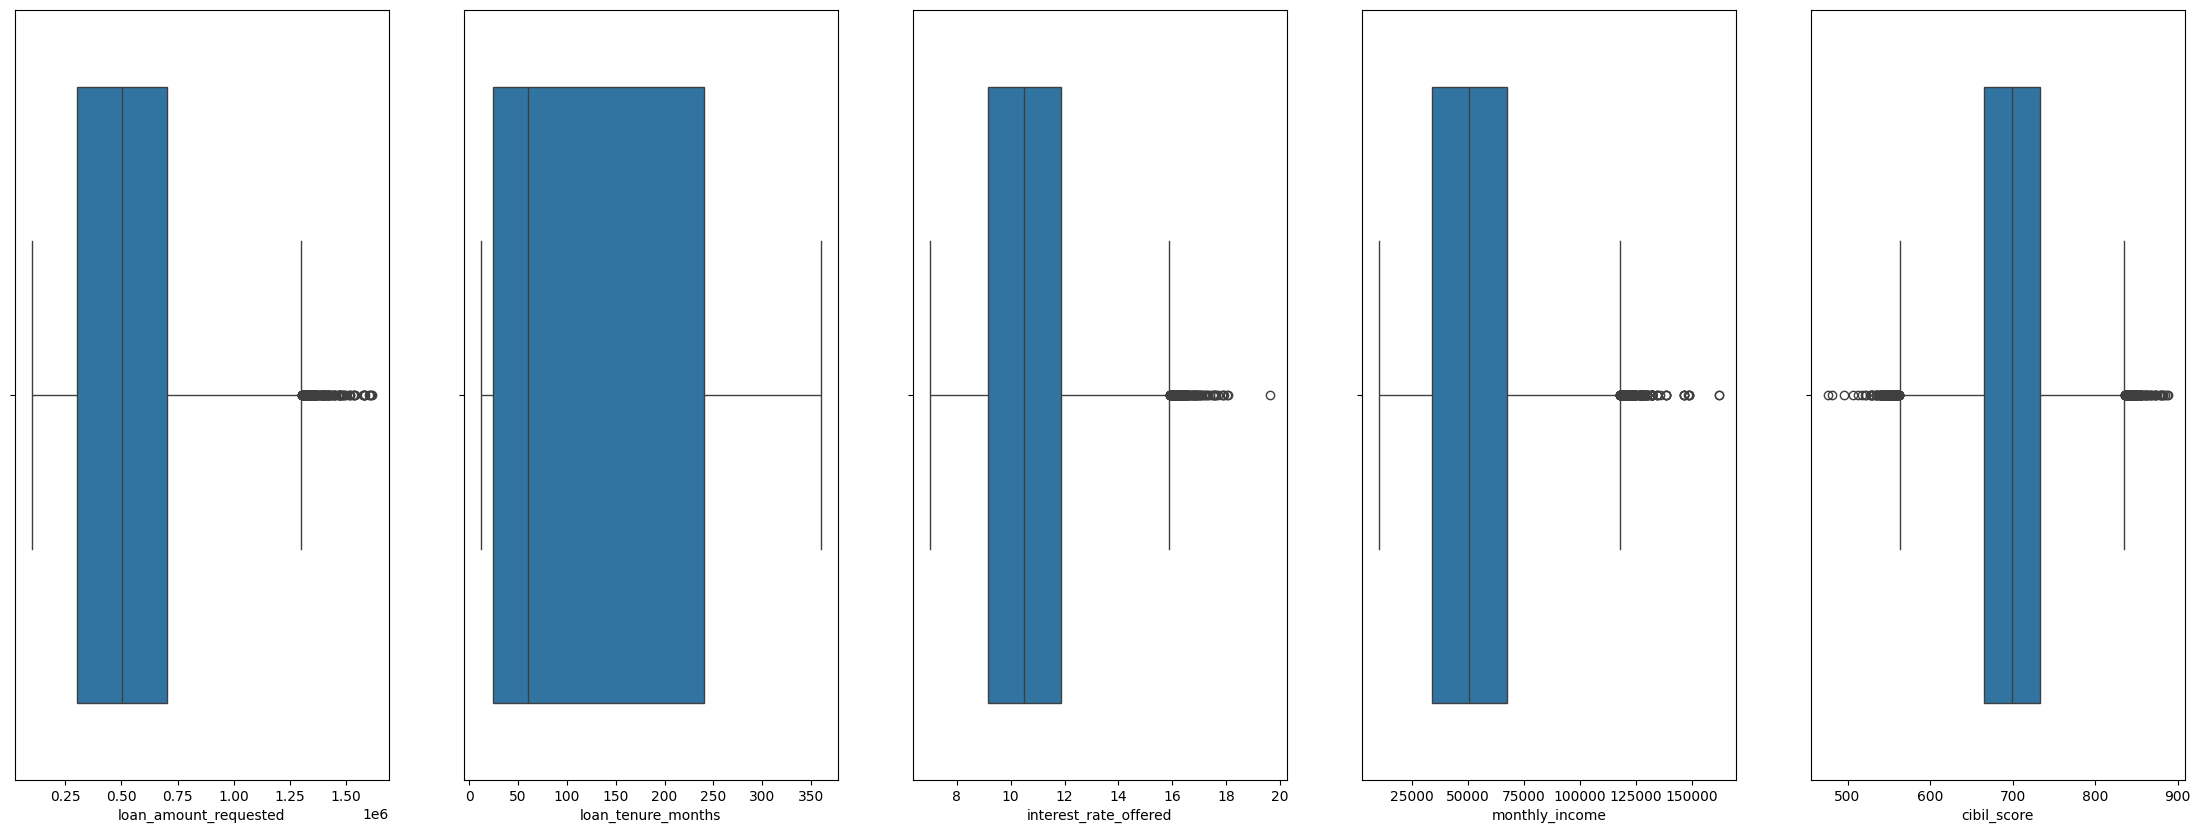

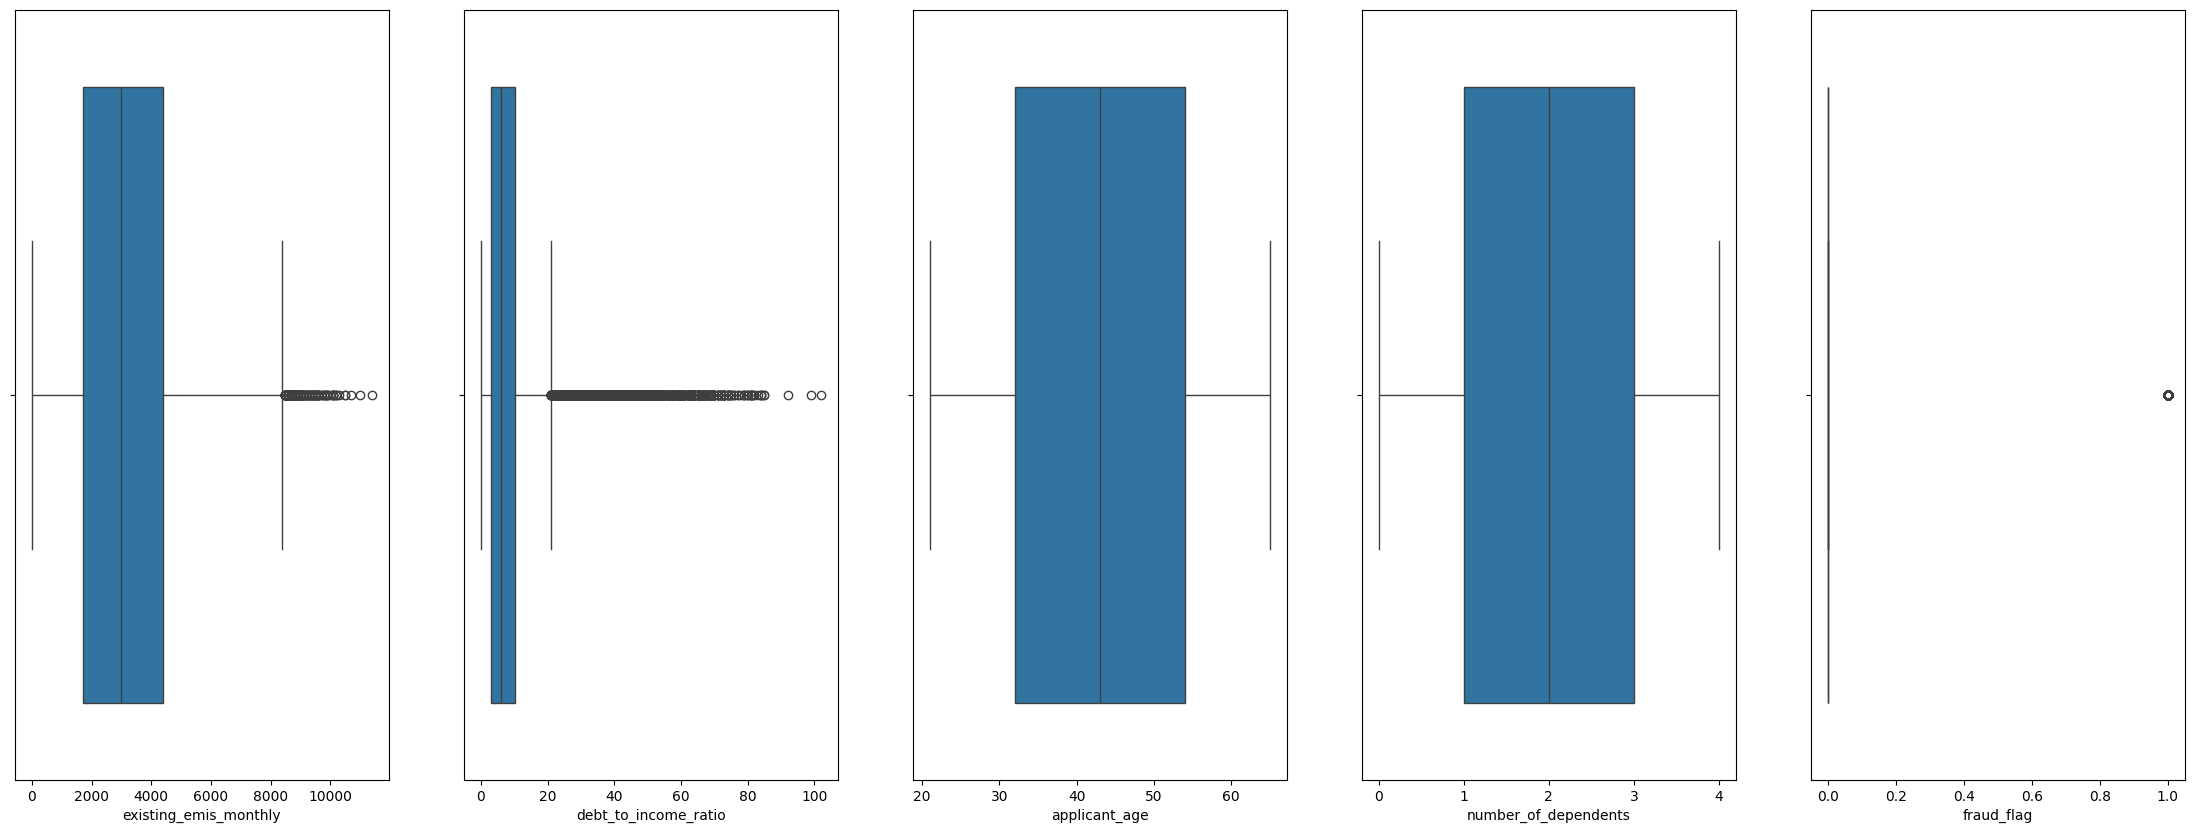

In [133]:
fig,ax = plt.subplots(1,5,figsize=(28,10))
for i,cols in enumerate(num_cols1[:5]):
    sns.boxplot(ax=ax[i],x=cols,data=df1)

fig,ax = plt.subplots(1,5,figsize=(28,10))
for i,cols in enumerate(num_cols1[5:]):
    sns.boxplot(ax=ax[i],x=cols,data=df1)

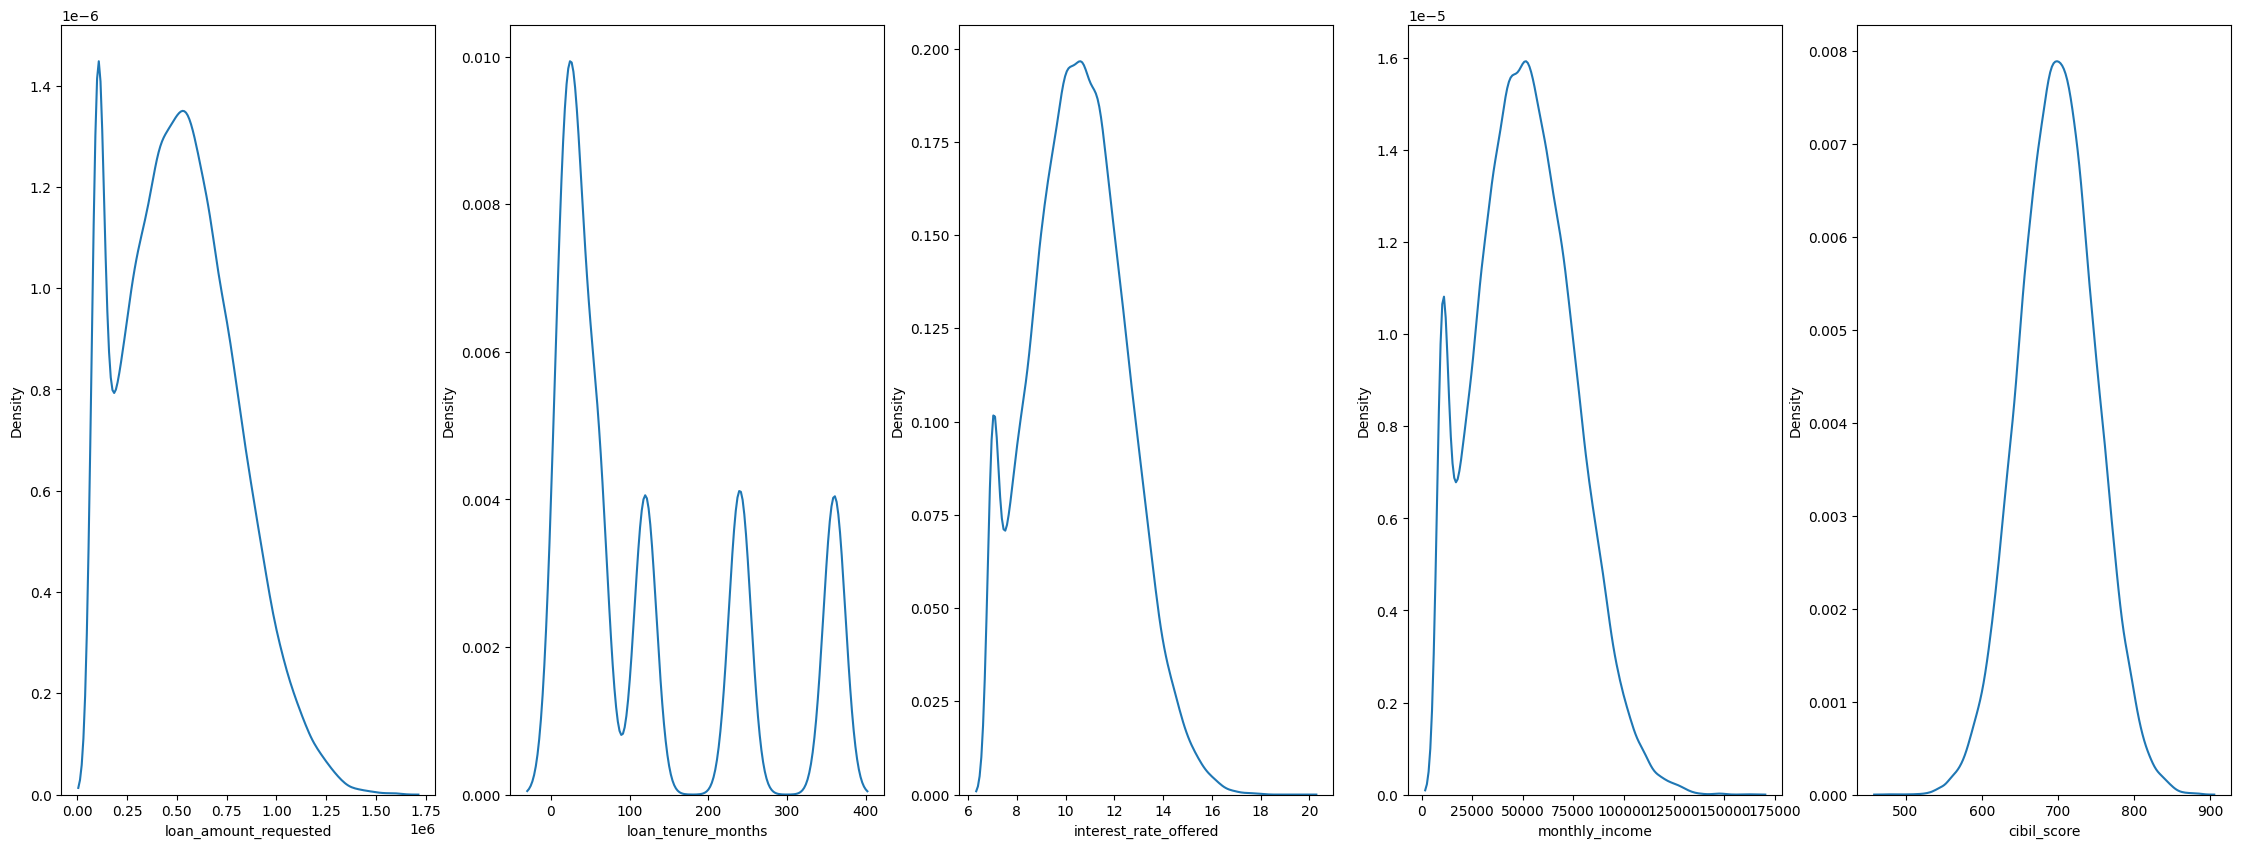

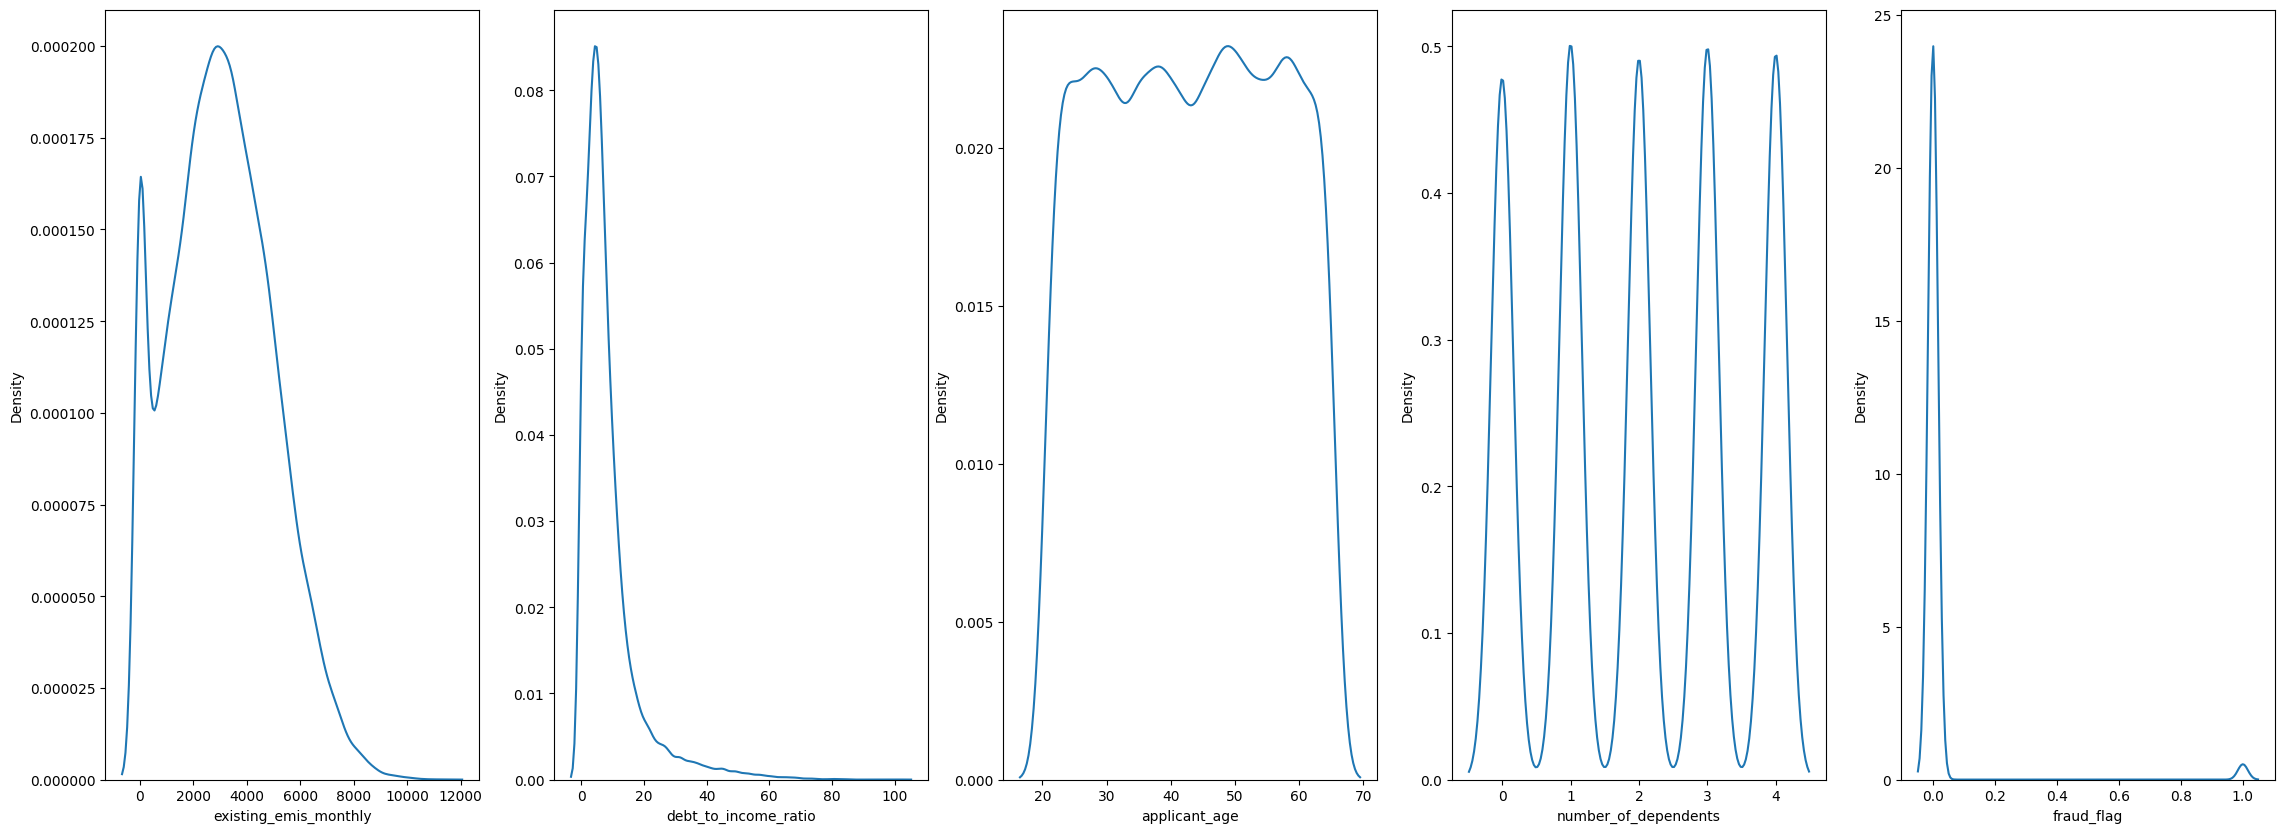

In [143]:
fig,ax = plt.subplots(1,5,figsize=(28,10))
for i,cols in enumerate(num_cols1[:5]):
    sns.kdeplot(ax=ax[i],x=cols,data=df1)

fig,ax = plt.subplots(1,5,figsize=(28,10))
for i,cols in enumerate(num_cols1[5:]):
    sns.kdeplot(ax=ax[i],x=cols,data=df1)

In [144]:
df2.head()

,customer_id,transaction_date,transaction_type,transaction_amount,merchant_category,merchant_name,transaction_location,account_balance_after_transaction,is_international_transaction,device_used,ip_address,transaction_status,transaction_source_destination,transaction_notes,fraud_flag
0,CUST102188,2022-01-04,Bill Payment,2100.0,Dining,"Rattan, Khanna and Magar","Srikakulam, Himachal Pradesh",8211.0,0,Web,31.102.21.141,Success,BCHG80012468703731,Payment for Dining,0
1,CUST107144,2022-01-03,UPI,1400.0,Travel,Chauhan LLC,"Giridih, Manipur",12858.0,0,Web,176.48.222.166,Success,CJPZ11841095072972,Payment for Travel,0
2,CUST102126,2022-01-15,Debit Card,1000.0,Entertainment,Halder-Sarma,"Avadi, Kerala",19268.0,0,ATM,181.62.105.161,Success,TLCG50761416960179,Payment for Entertainment,0
3,CUST109887,2022-01-08,Credit Card,10500.0,Utilities,"Anand, Khare and Balakrishnan","Navi Mumbai, Maharashtra",29585.0,0,ATM,121.157.246.80,Success,PRZJ55096553432036,Payment for Utilities,0
4,CUST108620,2022-01-02,Loan Disbursement,8100.0,Electronics,Zacharia and Sons,"Visakhapatnam, Gujarat",0.0,0,ATM,129.96.5.57,Success,NBAI29021393288369,Payment for Electronics,0
